# Feature Engineering and Data Splitting
## Notebook 3

### Introduction
In this notebook I will create preprocessing pipelines to transform features into a suitable form for modelling phase.

For categorical features I will use:
- **One Hot Encoder** when my final estimator will be a **non-tree type** model.
- **Ordinal Encoder** when my final estimator will be a **tree type** model.

For numerical features I will use:
- **Standard Scaler**. By standardising my numeric data I will ensure better model performance and reduced bias.

Lastly, I will perform the splitting of the data (decide cross-validation strategy).

#### Importing packages:

In [16]:
import pandas as pd
#
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import  make_column_transformer
from sklearn.model_selection import train_test_split

#### Importing the dataset:

In [17]:
data = pd.read_csv('data_clean/for_models_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               12500 non-null  int64  
 1   Age                       12500 non-null  float64
 2   Annual_Income             12500 non-null  float64
 3   Outstanding_Debt          12500 non-null  float64
 4   Total_EMI_per_month       12500 non-null  float64
 5   Delay_from_due_date       12500 non-null  float64
 6   Num_of_Delayed_Payment    12500 non-null  float64
 7   Credit_Utilization_Ratio  12500 non-null  float64
 8   Payment_Behaviour         12500 non-null  object 
 9   Credit_Mix                12500 non-null  object 
 10  Payment_of_Min_Amount     12500 non-null  object 
 11  Occupation                12500 non-null  object 
 12  Credit_Score              12500 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 1.2+ MB


#### Creating preprocessing pipelines:

Below I create a universal transformer function named **Preprocessor_function**. 

The **Preprocessor_function** is used to preprocess an input dataset to be suitable for Machine Learning processing.

The Preprocessor_function has **four parameters**:
- data: This is the input data that is to be preprocessed. It should be a pandas DataFrame.
- target_variable: This is a string that represents the name of the target variable column. By default, it is set to 'Credit_Score'.
- cat_encoder: This is a string that denotes the type of categorical encoder to be used. The options are ordinal ('ord') or one-hot ('oh'). By default, it is set to one-hot encoding ('oh').
- excluded_features: This is a list of strings, where each string is a column name that should be excluded from preprocessing. By default, it is set to None, which means that no column will be excluded.

The function **performs the following steps**:
- Checks if there are any excluded features. If there are, these are dropped from the data.
- Identifies the numeric and categorical columns in the data. The numeric columns are those with datatypes float64 and int64. The categorical columns are those with datatype object and are not the target variable.
- Depending on the value of cat_encoder, it constructs a preprocessor which standard scales the numeric columns, and either one-hot encodes or ordinal encodes the categorical columns. The remainder='drop' parameter in make_column_transformer function ensures that any other columns not specified are dropped.
- If cat_encoder = 'ord', an OrdinalEncoder is used to transform the categorical variables.
- If cat_encoder = 'oh', a OneHotEncoder is used instead.
- Returns an error message if the cat_encoder is not 'oh' or 'ord'.

The function then returns the preprocessor object.

In [18]:
def Preprocessor_function(data,target_variable = 'Credit_Score', cat_encoder = 'oh', excluded_features = None):
    """
    Preprocessor_function

    :param data: The input data to be preprocessed.
    :param target_variable: The name of the target variable column. Default is 'Credit_Score'.
    :param cat_encoder: The type of categorical encoder to use. Options are 'ord' and 'oh'. Default is 'oh'.
    :param excluded_features: List of column names to be excluded from preprocessing. Default is None.
    :return: The preprocessor object.

    """
    if excluded_features:
        excluded_features = list(set(excluded_features) & set(data.columns))
        data = data.drop(excluded_features, axis=1)
    
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.values.tolist()
    categorical_columns = \
        data.select_dtypes(include=['object']).drop(target_variable, axis = 1).columns.values.tolist()
    
    
    if cat_encoder == 'ord':
        # define the column transformer
        preprocessor = make_column_transformer(
            (StandardScaler(), numeric_columns),
            (OrdinalEncoder(), categorical_columns),
            remainder='drop'
        )

    elif cat_encoder == 'oh':
        preprocessor = make_column_transformer(
            (StandardScaler(), numeric_columns),
            (OneHotEncoder(drop = 'if_binary'), categorical_columns),
            remainder='drop'
        )
    else:
        return f"Please provide a cat_encoder: 'ord' or 'oh' "

    return preprocessor

#### Demonstrating the pipelines:
Let's understand better the structure of the preprocessing pipelines:

In [19]:
#usage (with cat_encoder = 'oh')
Preprocessor_function(data = data,
                      target_variable = 'Credit_Score',
                      cat_encoder = 'oh',
                      excluded_features = ['Customer_ID']
                      )

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Age', 'Annual_Income', 'Outstanding_Debt',
                                  'Total_EMI_per_month', 'Delay_from_due_date',
                                  'Num_of_Delayed_Payment',
                                  'Credit_Utilization_Ratio']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['Payment_Behaviour', 'Credit_Mix',
                                  'Payment_of_Min_Amount', 'Occupation'])])

In [20]:
#usage (with cat_encoder = 'ord')
Preprocessor_function(data = data,
                      target_variable = 'Credit_Score',
                      cat_encoder = 'ord',
                      excluded_features = ['Customer_ID']
                      )

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Age', 'Annual_Income', 'Outstanding_Debt',
                                  'Total_EMI_per_month', 'Delay_from_due_date',
                                  'Num_of_Delayed_Payment',
                                  'Credit_Utilization_Ratio']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['Payment_Behaviour', 'Credit_Mix',
                                  'Payment_of_Min_Amount', 'Occupation'])])

#### Transforming the Data
Now I will fit my preprocessors to my data and will transform the dataset:

In [21]:
pr_oh = \
Preprocessor_function(data = data,
                      target_variable = 'Credit_Score',
                      cat_encoder = 'oh',
                      excluded_features = ['Customer_ID']
                      ).fit(data)


pr_ord = \
    Preprocessor_function(data = data,
                          target_variable = 'Credit_Score',
                          cat_encoder = 'ord',
                          excluded_features = ['Customer_ID']
                          ).fit(data)

The code below does the following:

- Applies the one-hot encoder(preprocessing object) pr_oh to the data resulting in a transformed version of the data. This is done using the .transform() method. The resulting numpy array is converted to a dataframe. The column names of the new dataframe are created using the .get_feature_names_out() method on the pr_oh object.
- Prints out the total number of rows and columns in the transformed dataframe transformed_OHEnc using the .shape attribute of the dataframe.
- Displays the first three rows of the transformed dataframe using .head(3) method.

In [22]:
# transformer using One Hot Encoding:
transformed_OHEnc = pd.DataFrame(pr_oh.transform(data),
                                     columns=pr_oh.get_feature_names_out())


print('Count of rows in transformed dataset: '+ str(transformed_OHEnc.shape[0])+'\n')
print('Count of columns of the transformed dataset: '+ str(transformed_OHEnc.shape[1])+'\n')
# check:
transformed_OHEnc.head(3)

Count of rows in transformed dataset: 12500

Count of columns of the transformed dataset: 34


,standardscaler__Age,standardscaler__Annual_Income,standardscaler__Outstanding_Debt,standardscaler__Total_EMI_per_month,standardscaler__Delay_from_due_date,standardscaler__Num_of_Delayed_Payment,standardscaler__Credit_Utilization_Ratio,onehotencoder__Payment_Behaviour_High_spent_Large_value_payments,onehotencoder__Payment_Behaviour_High_spent_Medium_value_payments,onehotencoder__Payment_Behaviour_High_spent_Small_value_payments,...,onehotencoder__Occupation_Entrepreneur,onehotencoder__Occupation_Journalist,onehotencoder__Occupation_Lawyer,onehotencoder__Occupation_Manager,onehotencoder__Occupation_Mechanic,onehotencoder__Occupation_Media_Manager,onehotencoder__Occupation_Musician,onehotencoder__Occupation_Scientist,onehotencoder__Occupation_Teacher,onehotencoder__Occupation_Writer
0,-0.983952,-0.819625,-0.533485,-0.440275,-1.221445,-1.168423,-1.389402,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.519561,-0.408815,-0.710911,-0.640970,-1.221445,-1.487695,0.639567,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.037709,2.419305,-0.106664,0.847835,-0.883639,-1.168423,-0.806411,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In a similar logic, I check the transformation and dimensions of the dataset using ordinal encoding:

In [23]:
# transformer using Ordinal Encoding:
transformed_OrdEnc = pd.DataFrame(pr_ord.transform(data),
                                     columns=pr_ord.get_feature_names_out())


print('Count of rows in transformed dataset: '+ str(transformed_OrdEnc.shape[0])+'\n')
print('Count of columns of the transformed dataset: '+ str(transformed_OrdEnc.shape[1])+'\n')
# check:
transformed_OrdEnc.head(3)

Count of rows in transformed dataset: 12500

Count of columns of the transformed dataset: 11


,standardscaler__Age,standardscaler__Annual_Income,standardscaler__Outstanding_Debt,standardscaler__Total_EMI_per_month,standardscaler__Delay_from_due_date,standardscaler__Num_of_Delayed_Payment,standardscaler__Credit_Utilization_Ratio,ordinalencoder__Payment_Behaviour,ordinalencoder__Credit_Mix,ordinalencoder__Payment_of_Min_Amount,ordinalencoder__Occupation
0,-0.983952,-0.819625,-0.533485,-0.440275,-1.221445,-1.168423,-1.389402,1.0,1.0,1.0,12.0
1,-0.519561,-0.408815,-0.710911,-0.640970,-1.221445,-1.487695,0.639567,5.0,1.0,1.0,13.0
2,0.037709,2.419305,-0.106664,0.847835,-0.883639,-1.168423,-0.806411,2.0,1.0,1.0,4.0


##### Note:
 As shown above One Hot Encoder significantly increases the dimensions of the dataset.

#### Splitting the data:
I will keep 20% of the dataset for testing. Also, I will stratify the train and test subsets.

The **train_test_split** function from sklearn.model_selection is used to split the dataset X and target y into a training set (X_train and y_train) and a test set (X_test and y_test). In addition, the parameter **stratify=y** indicates that the data is split in a stratified fashion, using y as the class labels.

Stratification ensures that the train and test sets have approximately the same percentage of samples of each target class as the complete set. It is usually a better option for classification problems with an imbalance class issue.

In [24]:
X = data.drop(columns=['Customer_ID', 'Credit_Score'])
y = data['Credit_Score']

X_train, X_test, y_train, y_test = \
train_test_split(X, y,
                 random_state=42,
                 test_size=0.2,
                 stratify=y)

**Below I analyse X_train, X_test, y_train, y_test**:

- First let's check the columns of X_train:

In [25]:
print(X_train.columns.values)

['Age' 'Annual_Income' 'Outstanding_Debt' 'Total_EMI_per_month'
 'Delay_from_due_date' 'Num_of_Delayed_Payment' 'Credit_Utilization_Ratio'
 'Payment_Behaviour' 'Credit_Mix' 'Payment_of_Min_Amount' 'Occupation']


- What are the shapes of the subsets?

In [26]:
print('X_train shape: '+str(X_train.shape) )
print('y_train shape: '+str(y_train.shape)+'\n\n')

print('X_test shape: '+str(X_test.shape) )
print('y_test shape: '+str(y_test.shape))

X_train shape: (10000, 11)
y_train shape: (10000,)


X_test shape: (2500, 11)
y_test shape: (2500,)


- How many observations per class contained in train and test subsets?

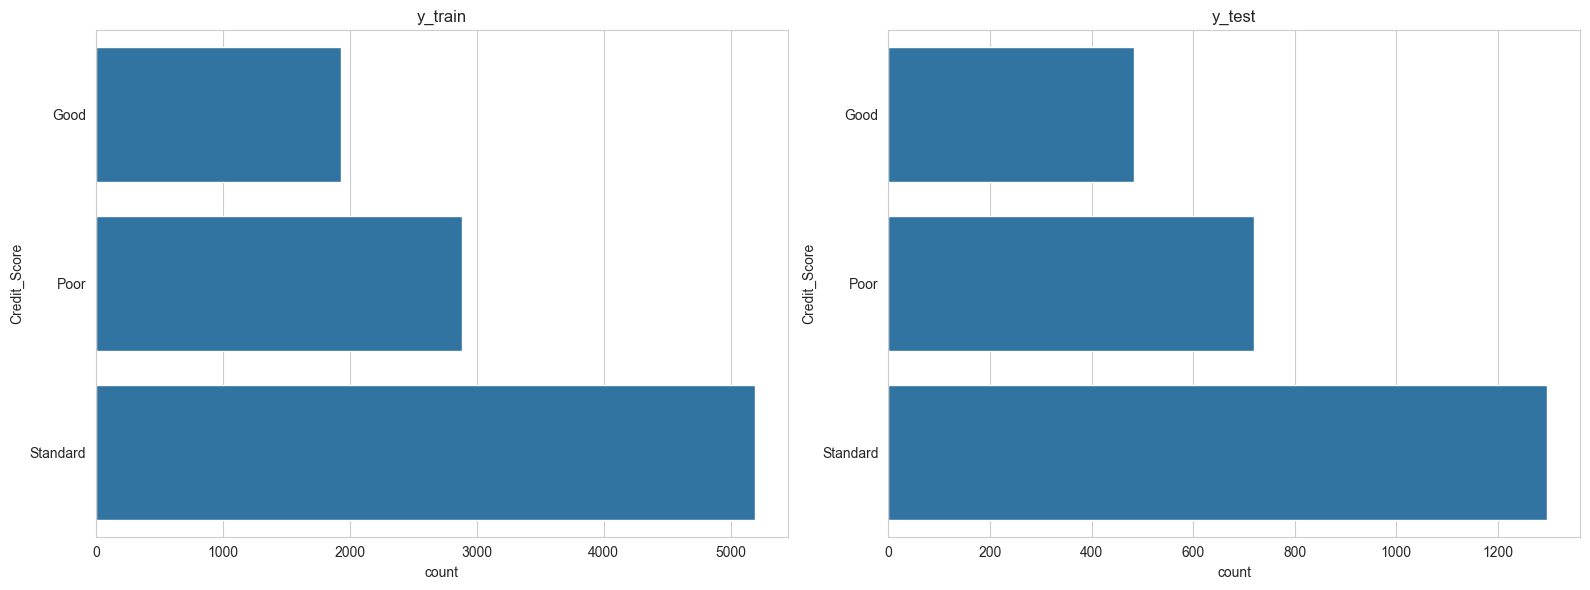

In [27]:
# Find the unique class labels
class_labels = y.unique()

# Sort the class labels
class_labels.sort()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# For 'y_train', pass class_labels to order parameter
sns.countplot(y_train, order=class_labels, ax=axes[0])
axes[0].set_title('y_train')

# For 'y_test', pass class_labels to order parameter
sns.countplot(y_test, order=class_labels, ax=axes[1])
axes[1].set_title('y_test')

plt.tight_layout()
plt.show()

In [28]:
# Proportion of observations per class in y_train
y_train_prop = y_train.value_counts(normalize=True)
print('Proportion of observations per class in y_train:')
print(y_train_prop)

# Proportion of observations per class in y_test
y_test_prop = y_test.value_counts(normalize=True)
print('\nProportion of observations per class in y_test:')
print(y_test_prop)

Proportion of observations per class in y_train:
Credit_Score
Standard    0.5188
Poor        0.2882
Good        0.1930
Name: proportion, dtype: float64

Proportion of observations per class in y_test:
Credit_Score
Standard    0.5188
Poor        0.2880
Good        0.1932
Name: proportion, dtype: float64


In [29]:
# Count of observations per class in y_train
y_train_count = y_train.value_counts(normalize=False)
print('Count of observations per class in y_train:')
print(y_train_count)

# Count of observations per class in y_test
y_test_count = y_test.value_counts(normalize=False)
print('\nCount of observations per class in y_test:')
print(y_test_count)

Count of observations per class in y_train:
Credit_Score
Standard    5188
Poor        2882
Good        1930
Name: count, dtype: int64

Count of observations per class in y_test:
Credit_Score
Standard    1297
Poor         720
Good         483
Name: count, dtype: int64


### Concluding

Throughout this notebook, I developed **feature engineering pipelines** that are crucial to preprocessing data for machine learning tasks. Furthermore, I chose the **data splitting strategy** that will be used on modelling phase.  

More specifically, I developed a function resulting in preprocessors for the transformation of dataset features. These preprocessors have been created to handle numerical and categorical data separately, utilising methods such as standard scaling and one-hot or ordinal encoding. This will allow the model to interpret the data more accurately.

These functions are now encapsulated in the script named **preprocessor.py** under the **custom_functions** directory. This organization provides an effective way to reuse these functions for similar tasks in the future without needing to rewrite or copy the code.

Additionally, I divided the data into training and testing subsets, allowing for the evaluation of model accuracy on unseen data; a crucial element in machine learning modelling. This split was performed in a stratified manner, ensuring that the proportions of classes in the target variable are maintained in both training and testing sets. Stratification helps improve the model's ability to predict less frequent classes and provides more reliable performance metrics.

Finally, I evaluated the distribution of observations per target class in both the y_test and y_train subsets. This step is particularly important in case the dataset contains imbalanced classes in the target variable. Identifying and addressing this imbalance is necessary, as not doing so can lead to a model that has poor predictive performance, particularly for the minority class.

In [30]:
print('Notebook runs without errors - End of Notebook 3')

Notebook runs without errors - End of Notebook 3
